In [4]:
from google.colab.patches import cv2_imshow
import cv2
import easyocr
import matplotlib.pyplot as plt
# %matplotlib inline

In [49]:
from google.colab import files
uploaded = files.upload()

Saving HR_NumberPlate_Swift.jpg to HR_NumberPlate_Swift.jpg


In [53]:
img = cv2.imread('HR_NumberPlate_Swift.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img2 = gray_img

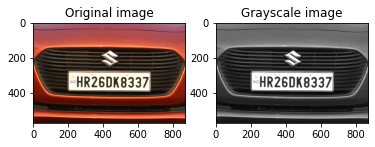

In [54]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image')

plt.show()

In [30]:
from google.colab import files
uploaded = files.upload()

Saving numberplate_haarcade.xml to numberplate_haarcade.xml


In [31]:
numberPlate_cascade = cv2.CascadeClassifier('numberplate_haarcade.xml')

In [55]:
plates = numberPlate_cascade.detectMultiScale(
      gray_img,scaleFactor=1.05, minNeighbors=7,
      minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
print(plates)

[[188 240 535 179]]


In [56]:
detections = numberPlate_cascade.detectMultiScale(gray_img, scaleFactor=1.05, minNeighbors=7)
print(detections)

[[188 240 535 179]]


In [57]:
for (x, y, w, h) in detections:
    # draw a rectangle around the number plate
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
    cv2.putText(img, "Number plate detected", (x - 20, y - 10),
                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 255), 2)

    # extract the number plate from the grayscale image
    number_plate = gray_img2[y:y + h, x:x + w]

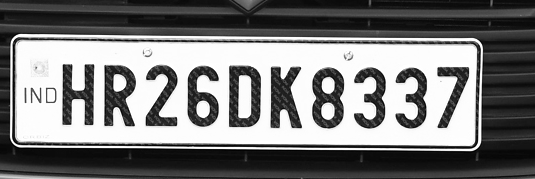

In [58]:
from google.colab.patches import cv2_imshow
Numbered_plate = cv2_imshow(number_plate)

In [59]:
reader = easyocr.Reader(['en'])

# detect text
text = reader.readtext(number_plate)
while len(text) == 0:
  continue
  print(text)
  print(text[0][1])
    # draw text in the frame
cv2.putText(img, text[0][1], (x, y-5), cv2.FONT_HERSHEY_COMPLEX, 0.8, 
(0, 255, 0), 2)

array([[[137, 117, 160],
        [138, 117, 162],
        [133, 112, 157],
        ...,
        [140, 120, 165],
        [140, 120, 165],
        [142, 122, 167]],

       [[138, 115, 160],
        [135, 114, 159],
        [135, 113, 161],
        ...,
        [138, 119, 168],
        [138, 119, 168],
        [138, 119, 168]],

       [[137, 114, 159],
        [134, 113, 158],
        [135, 114, 159],
        ...,
        [140, 121, 170],
        [136, 117, 166],
        [139, 120, 169]],

       ...,

       [[  2,  10,  57],
        [  4,  12,  59],
        [  2,  12,  59],
        ...,
        [  3,  12,  69],
        [  2,  11,  68],
        [  2,  13,  70]],

       [[  3,  12,  56],
        [  3,  12,  56],
        [  4,  13,  57],
        ...,
        [  1,  14,  66],
        [  1,  15,  64],
        [  2,  16,  65]],

       [[  3,  12,  56],
        [  4,  13,  57],
        [  3,  12,  56],
        ...,
        [  1,  14,  66],
        [  1,  15,  64],
        [  2,  16,  65]]

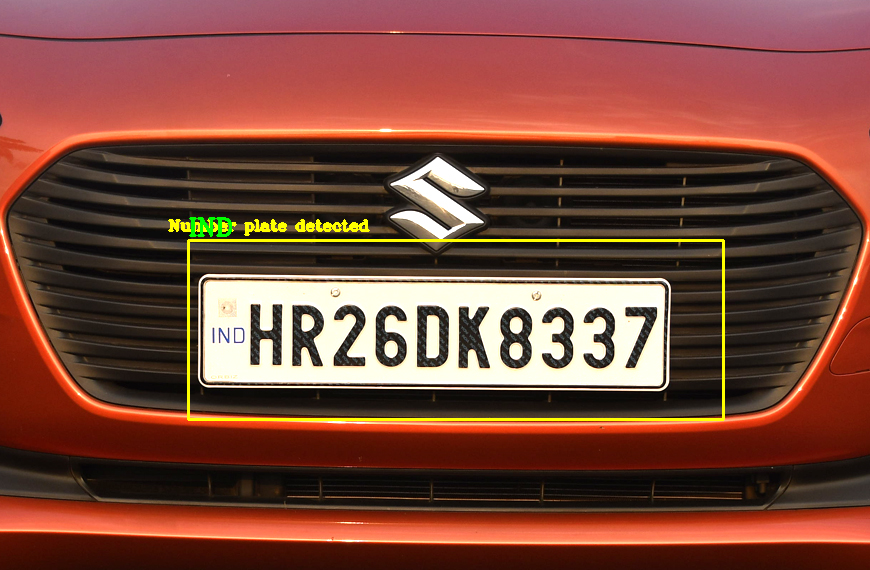

In [60]:
from google.colab.patches import cv2_imshow
Numbered_plate = cv2_imshow(img)